In [1]:
import math
import numpy as np
from sklearn import metrics
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
dataset = pd.read_csv('C:/Users/liping/OneDrive/文件/學校資料/碩一上/資料探勘/Hw/dataminingHW3/ObesityDataSet_raw_and_data_sinthetic.csv', na_values = '?' )

In [3]:
df = dataset
df = df.replace('?',np.NaN)
df = df.dropna()
df.values

array([['Female', 21.0, 1.62, ..., 'no', 'Public_Transportation',
        'Normal_Weight'],
       ['Female', 21.0, 1.52, ..., 'Sometimes', 'Public_Transportation',
        'Normal_Weight'],
       ['Male', 23.0, 1.8, ..., 'Frequently', 'Public_Transportation',
        'Normal_Weight'],
       ...,
       ['Female', 22.524036, 1.752206, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 24.361936, 1.73945, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III'],
       ['Female', 23.664709, 1.738836, ..., 'Sometimes',
        'Public_Transportation', 'Obesity_Type_III']], dtype=object)

In [4]:
#資料轉換(one-hot)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df[['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']]: 
    df[col] = le.fit_transform(df[col])

In [5]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.000000,1.620000,64.000000,1,0,2.0,3.0,2,0,2.000000,0,0.000000,1.000000,3,3,1
1,0,21.000000,1.520000,56.000000,1,0,3.0,3.0,2,1,3.000000,1,3.000000,0.000000,2,3,1
2,1,23.000000,1.800000,77.000000,1,0,2.0,3.0,2,0,2.000000,0,2.000000,1.000000,1,3,1
3,1,27.000000,1.800000,87.000000,0,0,3.0,3.0,2,0,2.000000,0,2.000000,0.000000,1,4,5
4,1,22.000000,1.780000,89.800000,0,0,2.0,1.0,2,0,2.000000,0,0.000000,0.000000,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,20.976842,1.710730,131.408528,1,1,3.0,3.0,2,0,1.728139,0,1.676269,0.906247,2,3,4
2107,0,21.982942,1.748584,133.742943,1,1,3.0,3.0,2,0,2.005130,0,1.341390,0.599270,2,3,4
2108,0,22.524036,1.752206,133.689352,1,1,3.0,3.0,2,0,2.054193,0,1.414209,0.646288,2,3,4
2109,0,24.361936,1.739450,133.346641,1,1,3.0,3.0,2,0,2.852339,0,1.139107,0.586035,2,3,4


In [6]:
X = df.drop(['NObeyesdad'], axis=1) #刪除欄位
Y = df['NObeyesdad'] 

In [7]:
#Min-Max
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1)).fit(X)
x_train_norm = scaler.transform(X)
x_train_norm

array([[0.        , 0.14893617, 0.32075472, ..., 0.5       , 1.        ,
        0.75      ],
       [0.        , 0.14893617, 0.13207547, ..., 0.        , 0.66666667,
        0.75      ],
       [1.        , 0.19148936, 0.66037736, ..., 0.5       , 0.33333333,
        0.75      ],
       ...,
       [0.        , 0.18136247, 0.5702    , ..., 0.323144  , 0.66666667,
        0.75      ],
       [0.        , 0.22046672, 0.54613208, ..., 0.2930175 , 0.66666667,
        0.75      ],
       [0.        , 0.20563211, 0.54497358, ..., 0.3570685 , 0.66666667,
        0.75      ]])

In [37]:
from datetime import datetime
start = datetime.now()

#DBSCAN模型
clustering=DBSCAN(eps=0.5,min_samples=25).fit(x_train_norm)

end = datetime.now()
time = end - start

#clustering
print("分群時間：", time)

分群時間： 0:00:00.060837


In [38]:
clustering.labels_

array([-1, -1, -1, ...,  3,  3,  3], dtype=int64)

In [39]:
n_clusters_ = len(set(clustering.labels_)) - (1 if -1 in clustering.labels_ else 0)
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 7


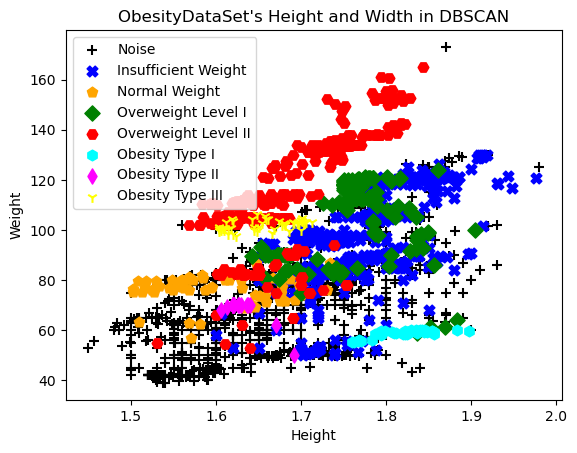

In [53]:
C0 = df[clustering.labels_ == 0]
C1 = df[clustering.labels_ == 1]
C2 = df[clustering.labels_ == 2]
C3 = df[clustering.labels_ == 3]
C4 = df[clustering.labels_ == 4]
C5 = df[clustering.labels_ == 5]
C6 = df[clustering.labels_ == 6]
C = df[clustering.labels_ == -1]
plt.scatter(C['Height'],C['Weight'],marker='+',c="black",s=50,label = 'Noise' )
plt.scatter(C0['Height'],C0['Weight'],marker='X',c="blue",s=60,label = 'Insufficient Weight' )
plt.scatter(C1['Height'],C1['Weight'],marker='p',c="orange",s=60, label = 'Normal Weight')
plt.scatter(C2['Height'],C2['Weight'],marker='D',c="green",s=60,label = 'Overweight Level I')
plt.scatter(C3['Height'],C3['Weight'],marker='H',c="red",s=60,label = 'Overweight Level II')
plt.scatter(C4['Height'],C4['Weight'],marker='h',c="cyan",s=60,label = 'Obesity Type I')
plt.scatter(C5['Height'],C5['Weight'],marker='d',c="magenta",s=60,label = 'Obesity Type II')
plt.scatter(C6['Height'],C6['Weight'],marker='1',c="yellow",s=60,label = 'Obesity Type III')

plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('ObesityDataSet\'s Height and Width in DBSCAN')
plt.legend()
plt.show()

In [50]:
#衡量分群品質
#purity指標
def purity_score(Y, X):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(Y, X)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

print(purity_score(Y,clustering.labels_))

0.443391757460919


In [51]:
#輸出Silhouette Coefficient指標
print("Silhouette Coefficient:",metrics.silhouette_score(df, clustering.labels_, metric='euclidean'))

Silhouette Coefficient: -0.3359042795278982
